## Data Preprocessing

### Importing the libraries

In [49]:
import numpy as np
import pandas as pd

### Importing the dataset

In [50]:
dataset = pd.read_csv('dataset.csv', sep=";")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Delete no SIN cities

X = np.delete(X, [8, 20, 25], 1)

### Encoding cyclical continuous features


#### Months

In [51]:
months_in_year = 12
months = X[:, 1]

sin_month = np.sin(2*np.pi*months/months_in_year)
cos_month = np.cos(2*np.pi*months/months_in_year)

# remove month original collumn
X = np.delete(X, 1, 1)

# insert new collums features
X = np.insert(X, 1, sin_month, 1)
X = np.insert(X, 2, cos_month, 1)

#### hours

In [52]:
hours_in_day = 24
hours = X[:, 4]

sin_hour = np.sin(2*np.pi*hours/hours_in_day)
cos_hour = np.cos(2*np.pi*hours/hours_in_day)

# remove month original collumn
X = np.delete(X, 4, 1)

# insert new collums features
X = np.insert(X, 4, sin_hour, 1)
X = np.insert(X, 5, cos_hour, 1)

#### weekdays

In [53]:
number_of_weekdays = 7
weekdays = X[:, 6]

sin_weekdays = np.sin(2*np.pi*weekdays/number_of_weekdays)
cos_weekdays = np.cos(2*np.pi*weekdays/number_of_weekdays)

# remove month original collumn
X = np.delete(X, 6, 1)

# insert new collums features
X = np.insert(X, 6, sin_weekdays, 1)
X = np.insert(X, 7, cos_weekdays, 1)

In [54]:
dataset

,Anos após 2000,Mês do Ano,Dia do Mês,Hora do dia,Dia da Semana,Feriado,temp-go.csv,temp-to.csv,temp-am.csv,temp-df.csv,...,temp-pb.csv,temp-mt.csv,temp-es.csv,temp-ba.csv,temp-ap.csv,temp-pr.csv,temp-sc.csv,temp-se.csv,temp-ma.csv,Carga
0,3,5,1,0,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,40.88700
1,3,5,1,1,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,38.20500
2,3,5,1,2,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,35.06800
3,3,5,1,3,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,33.98700
4,3,5,1,4,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,33.56600
5,3,5,1,5,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,33.16000
6,3,5,1,6,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,32.73800
7,3,5,1,7,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,31.14600
8,3,5,1,8,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,30.64600
9,3,5,1,9,2,1,27.50,30.13,27.67,24.97,...,25.80,29.10,26.43,27.90,28.27,20.60,22.67,27.97,25.70,32.27500


### Splitting the dataset into the Training set and Test set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

### Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Correlation matrix

In [57]:
values = np.insert(X, X.shape[1], y, 1)
dataframe = pd.DataFrame(values)
corr = dataframe.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,1,0.0475266,-0.0314323,0.000427188,-3.45957e-18,2.25798e-05,-0.0165139,0.00569069,-0.00458995,0.0794392,0.129988,0.0901605,0.0240733,0.155533,0.0348852,0.090635,0.090635,0.155662,0.015646,-0.0351522,-0.129365,0.0552698,0.0322119,0.0724796,0.0372936,-0.11956,0.0315316,0.0190245,0.172727,0.269607,0.701916
1,0.0475266,1,-0.0102895,-0.010199,-1.92096e-17,0.000174629,0.0123829,-0.00442881,0.0570348,-0.276872,-0.528333,-0.170726,0.415154,0.496348,0.505166,0.156611,0.156611,0.0154655,0.533683,0.400076,-0.554196,0.270378,0.515427,-0.125573,0.492234,0.527896,0.348623,0.532561,0.601886,-0.375781,0.0971379
2,-0.0314323,-0.0102895,1,-0.00445413,4.2778e-17,-0.000158008,-0.00862773,0.00631095,0.0467044,0.198912,-0.261351,0.290267,0.661345,0.508963,0.554688,0.483819,0.483819,0.445777,0.432935,0.486856,0.363989,0.49586,0.472626,0.348411,0.456702,0.553713,0.544596,0.611751,0.428924,0.272664,0.100707
3,0.000427188,-0.010199,-0.00445413,1,-1.48107e-17,2.74582e-05,0.000483357,0.00241855,-0.0594843,0.0293866,-0.0356408,-0.00414627,-0.0231505,-0.00161374,-0.00241435,0.017046,0.017046,-0.0401346,-0.0242441,0.00149682,0.00481617,-0.0266034,-0.017856,-0.013526,-0.00918783,-0.0203438,-0.0216861,-0.0221057,-0.0309759,-0.0161551,0.00698089
4,-3.45957e-18,-1.92096e-17,4.2778e-17,-1.48107e-17,1,-3.70131e-17,-2.03916e-17,2.00337e-17,-1.81905e-17,7.1434e-18,3.11302e-18,-2.05153e-18,-3.0074e-18,3.25511e-18,3.32037e-19,6.5838e-19,6.5838e-19,-5.42175e-19,-5.3252e-18,-8.41904e-19,-1.78493e-18,-1.13065e-18,-1.00505e-17,-3.73447e-18,1.19786e-18,7.95883e-19,-4.52526e-18,-2.77209e-18,2.88774e-18,-4.98086e-18,-0.44168
5,2.25798e-05,0.000174629,-0.000158008,2.74582e-05,-3.70131e-17,1,0.000163716,-0.000153039,-4.70928e-05,-0.000221373,-0.000182946,-0.000243711,-8.18811e-05,-0.000157892,-0.000143557,-0.000232764,-0.000232764,-0.000240376,-0.000113659,-5.22071e-05,-0.000317406,-0.000141006,-0.000103078,-0.000189314,-0.000114454,-0.000131743,-8.46659e-05,-2.88665e-05,-0.000101784,-0.000267773,-0.112454
6,-0.0165139,0.0123829,-0.00862773,0.000483357,-2.03916e-17,0.000163716,1,0.00813659,0.0253331,-0.0276536,-0.0223379,-0.0255236,0.00168626,0.0132935,-0.00240087,-0.00143113,-0.00143113,-0.0023466,0.018346,0.0067665,-0.0105974,-0.0188457,-0.00116506,-0.00190356,-0.0103095,0.0119012,0.00368402,0.00283231,0.00185107,-0.00991112,0.209091
7,0.00569069,-0.00442881,0.00631095,0.00241855,2.00337e-17,-0.000153039,0.00813659,1,-0.020708,-0.00446565,-0.00930208,-0.00199785,0.0042977,-0.0067604,-0.00850045,-0.00842509,-0.00842509,-0.0126535,-0.0203938,0.000488881,0.00131445,-0.00619619,-0.0122146,-0.025914,-0.00205702,0.0136554,-0.000131122,0.00218031,-0.00130195,0.00341087,-0.117761
8,-0.00458995,0.0570348,0.0467044,-0.0594843,-1.81905e-17,-4.70928e-05,0.0253331,-0.020708,1,0.000607964,-0.0494818,0.0131056,0.0421053,0.0561607,0.0535525,0.0312288,0.0312288,0.0336881,0.0581582,0.0370392,-0.00750408,0.0337101,0.0566282,0.023824,0.0496575,0.0598694,0.0250873,0.0437683,0.0675,-0.017861,-0.102864
9,0.0794392,-0.276872,0.198912,0.0293866,7.1434e-18,-0.000221373,-0.0276536,-0.00446565,0.000607964,1,0.424132,0.785463,0.0784965,0.00583536,0.00638837,0.491626,0.491626,0.156421,-0.0127275,0.202356,0.287479,0.329651,0.00734826,0.47367,0.17897,-0.000282754,0.229695,0.0768769,-0.00722982,0.234232,0.10896


### Input - output correlation

In [58]:
values = np.insert(X, X.shape[1], y, 1)
dataframe = pd.DataFrame(values)
corr = dataframe.corr(min_periods=1000)
corr[30]

0     0.701916
1     0.097138
2     0.100707
3     0.006981
4    -0.441680
5    -0.112454
6     0.209091
7    -0.117761
8    -0.102864
9     0.108960
10    0.035750
11    0.130954
12    0.147733
13    0.204680
14    0.126231
15    0.190142
16    0.190142
17    0.157409
18    0.104127
19    0.120991
20   -0.047562
21    0.180590
22    0.120949
23    0.124720
24    0.154433
25    0.022661
26    0.167271
27    0.156400
28    0.214944
29    0.169051
30    1.000000
Name: 30, dtype: float64

In [60]:
# Remove features where correlation is less than 0.01
clean_X = np.delete(X, 3, 1)

# Neural Networking Training

## Importing Keras lib

In [61]:
import keras
from keras.models import Sequential # used to initialize the NN
from keras.layers import Dense # create the layers
from keras.callbacks import History

## Initialising ANN

In [62]:
network = Sequential()

## Adding layers

In [63]:
network.add(Dense(input_dim=X_train.shape[1], output_dim=1, activation='linear', bias_initializer='random_uniform'))

/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=30, activation="linear", bias_initializer="random_uniform", units=1)`
  """Entry point for launching an IPython kernel.


## Compile and register history

In [64]:
network.compile(optimizer='adam', loss='mean_squared_error')
history = History()

## Train

In [65]:
network.fit(X_train, y_train, epochs=50, callbacks=[history])
y_pred = network.predict(X_test)

Epoch 1/50
78403/78403 [==============================] - 2s 22us/step - loss: 2748.9254
Epoch 2/50
78403/78403 [==============================] - 2s 21us/step - loss: 2479.7797
Epoch 3/50
78403/78403 [==============================] - 2s 21us/step - loss: 2233.8058
Epoch 4/50
78403/78403 [==============================] - 2s 22us/step - loss: 2005.8760
Epoch 5/50
78403/78403 [==============================] - 2s 22us/step - loss: 1793.4459
Epoch 6/50
78403/78403 [==============================] - 2s 22us/step - loss: 1595.1147
Epoch 7/50
78403/78403 [==============================] - 2s 21us/step - loss: 1409.8401
Epoch 8/50
78403/78403 [==============================] - 2s 22us/step - loss: 1236.9395
Epoch 9/50
78403/78403 [==============================] - 2s 22us/step - loss: 1076.1658
Epoch 10/50
78403/78403 [==============================] - 2s 22us/step - loss: 927.2559
Epoch 11/50
78403/78403 [==============================] - 2s 22us/step - loss: 790.1252
Epoch 12/50
78403/784

# Ploting results

## Ploting training loss function over epochs

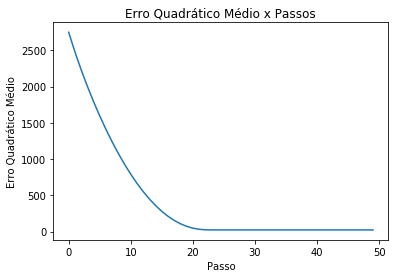

In [66]:
import matplotlib.pyplot as plt

file = plt.figure()
plt.plot(history.history['loss'])
plt.title('Erro Quadrático Médio x Passos')
plt.ylabel('Erro Quadrático Médio')
plt.xlabel('Passo')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network1.pdf", bbox_inches='tight')

In [67]:
y_mean = np.mean(y)
error = history.history['loss'][-1]
percentage_error = error/y_mean * 100
percentage_error

42.24038194121963

## Ploting data samples

### Test base

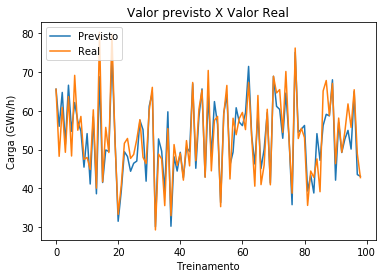

In [74]:
file = plt.figure()

plt.plot([y_pred[n] for n in range(0, len(y_pred)) if n % 200 == 0])
plt.plot([y_test[n] for n in range(0, len(y_pred)) if n % 200 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-base-teste-linear.pdf", bbox_inches='tight')

### Last Week

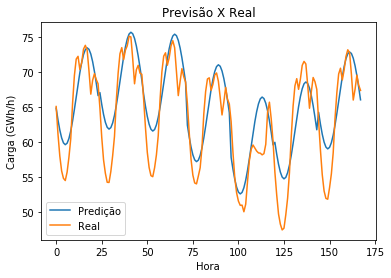

In [76]:
sc = StandardScaler()
y_last_linear = network.predict(sc.fit_transform(X))

file = plt.figure()

plt.plot(y_last_linear[-24*7:], label="Predição")
plt.plot(y[-24*7:], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-ultima-semana-linear.pdf", bbox_inches='tight')


# Others networks exp

### 2 layers, relu + linear

In [68]:
network_no_linear = Sequential()
network_no_linear.add(Dense(input_dim=X_train.shape[1], output_dim=44, activation='relu', bias_initializer='random_normal'))
network_no_linear.add(Dense(output_dim=1, activation='linear', bias_initializer='random_normal'))
network_no_linear.compile(optimizer='adam', loss='mean_squared_error')
history_no_linear = History()

network_no_linear.fit(X_train, y_train, epochs=50, callbacks=[history_no_linear])
y_pred_no_linear = network_no_linear.predict(X_test)

/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=30, activation="relu", bias_initializer="random_normal", units=44)`
  
/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
78403/78403 [==============================] - 2s 25us/step - loss: 393.6138
Epoch 2/50
78403/78403 [==============================] - 2s 23us/step - loss: 24.1222
Epoch 3/50
78403/78403 [==============================] - 2s 23us/step - loss: 12.0723
Epoch 4/50
78403/78403 [==============================] - 2s 23us/step - loss: 8.9102
Epoch 5/50
78403/78403 [==============================] - 2s 23us/step - loss: 7.4960
Epoch 6/50
78403/78403 [==============================] - 2s 22us/step - loss: 6.5986
Epoch 7/50
78403/78403 [==============================] - 2s 23us/step - loss: 5.9544
Epoch 8/50
78403/78403 [==============================] - 2s 23us/step - loss: 5.3791
Epoch 9/50
78403/78403 [==============================] - 2s 23us/step - loss: 4.9415
Epoch 10/50
78403/78403 [==============================] - 2s 23us/step - loss: 4.6082
Epoch 11/50
78403/78403 [==============================] - 2s 23us/step - loss: 4.3507
Epoch 12/50
78403/78403 [=======================

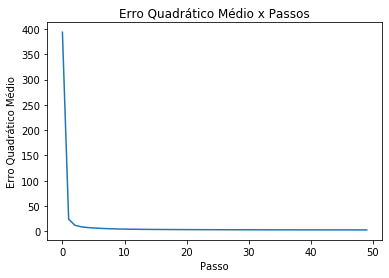

In [69]:
file = plt.figure()
plt.plot(history.history['loss'])
plt.title('Erro Quadrático Médio x Passos')
plt.ylabel('Erro Quadrático Médio')
plt.xlabel('Passo')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-relu.pdf", bbox_inches='tight')

In [70]:
y_mean = np.mean(y)
error = history_no_linear.history['loss'][-1]
percentage_error = error/y_mean * 100
percentage_error

5.21364086587227

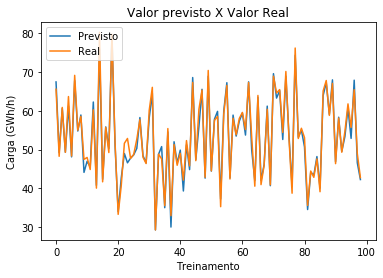

In [77]:
### Ploting for test base

file = plt.figure()

plt.plot([y_pred_no_linear[n] for n in range(0, len(y_pred_no_linear)) if n % 200 == 0])
plt.plot([y_test[n] for n in range(0, len(y_pred_no_linear)) if n % 200 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-base-teste-nao-linear.pdf", bbox_inches='tight')

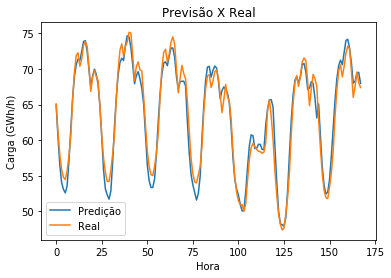

In [78]:
### Ploting for last week

sc = StandardScaler()
y_last_no_linear = network_no_linear.predict(sc.fit_transform(X))

file = plt.figure()

plt.plot(y_last_no_linear[-24*7:], label="Predição")
plt.plot(y[-24*7:], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-ultima-semana-nao-linear.pdf", bbox_inches='tight')

### Holidays networks

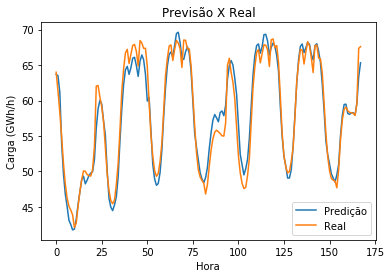

In [104]:
### Ploting for last week

sc = StandardScaler()
y_last_no_linear = network_no_linear.predict(sc.fit_transform(X))

file = plt.figure()

plt.plot(y_last_no_linear[-24*7*4 -3 :-24*7*3 -3], label="Predição")
plt.plot(y[-24*7*4 -3 :-24*7*3 -3], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-feriado-semana-nao-linear.pdf", bbox_inches='tight')

#### for holidays

In [121]:
#  filter original db
holidays_X = X[X[:, 8] == 1, :]
holidays_X = np.delete(holidays_X, 8, 1)

holidays_y = y[X[:, 8] == 1]

# split into train and test sets
holidays_X_train, holidays_X_test, holidays_y_train, holidays_y_test = train_test_split(holidays_X, holidays_y, test_size = 0.2 , random_state = 0)
sc = StandardScaler()

# scale
holidays_X_train = sc.fit_transform(holidays_X_train)
holidays_X_test = sc.transform(holidays_X_test)

# build network
network_holidays = Sequential()
network_holidays.add(Dense(input_dim=holidays_X_train.shape[1], output_dim=44, activation='relu', bias_initializer='random_normal'))
network_holidays.add(Dense(output_dim=1, activation='linear', bias_initializer='random_normal'))
network_holidays.compile(optimizer='adam', loss='mean_squared_error')
history_holidays = History()

# train
network_holidays.fit(holidays_X_train, holidays_y_train, epochs=500, callbacks=[history_holidays])
y_pred_holidays = network_holidays.predict(holidays_X_test)



/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=29, activation="relu", bias_initializer="random_normal", units=44)`
/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`


Epoch 1/500
2668/2668 [==============================] - 0s 112us/step - loss: 2019.3012
Epoch 2/500
2668/2668 [==============================] - 0s 27us/step - loss: 1554.2137
Epoch 3/500
2668/2668 [==============================] - 0s 30us/step - loss: 981.3986
Epoch 4/500
2668/2668 [==============================] - 0s 29us/step - loss: 555.0912
Epoch 5/500
2668/2668 [==============================] - 0s 27us/step - loss: 352.3737
Epoch 6/500
2668/2668 [==============================] - 0s 32us/step - loss: 254.8858
Epoch 7/500
2668/2668 [==============================] - 0s 31us/step - loss: 193.4860
Epoch 8/500
2668/2668 [==============================] - 0s 37us/step - loss: 152.4129
Epoch 9/500
2668/2668 [==============================] - 0s 30us/step - loss: 124.4253
Epoch 10/500
2668/2668 [==============================] - 0s 28us/step - loss: 104.9740
Epoch 11/500
2668/2668 [==============================] - 0s 30us/step - loss: 90.0519
Epoch 12/500
2668/2668 [===============

2668/2668 [==============================] - 0s 30us/step - loss: 4.6226
Epoch 96/500
2668/2668 [==============================] - 0s 26us/step - loss: 4.5097
Epoch 97/500
2668/2668 [==============================] - 0s 27us/step - loss: 4.5219
Epoch 98/500
2668/2668 [==============================] - 0s 29us/step - loss: 4.4558
Epoch 99/500
2668/2668 [==============================] - 0s 28us/step - loss: 4.4218
Epoch 100/500
2668/2668 [==============================] - 0s 28us/step - loss: 4.3790
Epoch 101/500
2668/2668 [==============================] - 0s 29us/step - loss: 4.3812
Epoch 102/500
2668/2668 [==============================] - 0s 27us/step - loss: 4.3309
Epoch 103/500
2668/2668 [==============================] - 0s 27us/step - loss: 4.2314
Epoch 104/500
2668/2668 [==============================] - 0s 26us/step - loss: 4.2564
Epoch 105/500
2668/2668 [==============================] - 0s 28us/step - loss: 4.1737
Epoch 106/500
2668/2668 [==============================] - 0s

2668/2668 [==============================] - 0s 29us/step - loss: 2.4735
Epoch 190/500
2668/2668 [==============================] - 0s 26us/step - loss: 2.4771
Epoch 191/500
2668/2668 [==============================] - 0s 26us/step - loss: 2.4133
Epoch 192/500
2668/2668 [==============================] - 0s 28us/step - loss: 2.4187
Epoch 193/500
2668/2668 [==============================] - 0s 26us/step - loss: 2.4026
Epoch 194/500
2668/2668 [==============================] - 0s 27us/step - loss: 2.3770
Epoch 195/500
2668/2668 [==============================] - 0s 27us/step - loss: 2.3650
Epoch 196/500
2668/2668 [==============================] - 0s 27us/step - loss: 2.3808
Epoch 197/500
2668/2668 [==============================] - 0s 25us/step - loss: 2.3577
Epoch 198/500
2668/2668 [==============================] - 0s 27us/step - loss: 2.3462
Epoch 199/500
2668/2668 [==============================] - 0s 26us/step - loss: 2.3459
Epoch 200/500
2668/2668 [==============================] 

2668/2668 [==============================] - 0s 25us/step - loss: 1.8428
Epoch 284/500
2668/2668 [==============================] - 0s 25us/step - loss: 1.8898
Epoch 285/500
2668/2668 [==============================] - 0s 26us/step - loss: 1.8894
Epoch 286/500
2668/2668 [==============================] - 0s 26us/step - loss: 1.8762
Epoch 287/500
2668/2668 [==============================] - 0s 25us/step - loss: 1.8421
Epoch 288/500
2668/2668 [==============================] - 0s 25us/step - loss: 1.8641
Epoch 289/500
2668/2668 [==============================] - 0s 26us/step - loss: 1.8455
Epoch 290/500
2668/2668 [==============================] - 0s 30us/step - loss: 1.8706
Epoch 291/500
2668/2668 [==============================] - 0s 26us/step - loss: 1.8444
Epoch 292/500
2668/2668 [==============================] - 0s 29us/step - loss: 1.8355
Epoch 293/500
2668/2668 [==============================] - 0s 34us/step - loss: 1.8684
Epoch 294/500
2668/2668 [==============================] 

2668/2668 [==============================] - 0s 27us/step - loss: 1.6835
Epoch 378/500
2668/2668 [==============================] - 0s 28us/step - loss: 1.6637
Epoch 379/500
2668/2668 [==============================] - 0s 27us/step - loss: 1.6601
Epoch 380/500
2668/2668 [==============================] - 0s 26us/step - loss: 1.6889
Epoch 381/500
2668/2668 [==============================] - 0s 27us/step - loss: 1.6576
Epoch 382/500
2668/2668 [==============================] - 0s 27us/step - loss: 1.6743
Epoch 383/500
2668/2668 [==============================] - 0s 26us/step - loss: 1.6504
Epoch 384/500
2668/2668 [==============================] - 0s 26us/step - loss: 1.6445
Epoch 385/500
2668/2668 [==============================] - 0s 27us/step - loss: 1.6519
Epoch 386/500
2668/2668 [==============================] - 0s 27us/step - loss: 1.6796
Epoch 387/500
2668/2668 [==============================] - 0s 25us/step - loss: 1.6655
Epoch 388/500
2668/2668 [==============================] 

2668/2668 [==============================] - 0s 29us/step - loss: 1.5592
Epoch 472/500
2668/2668 [==============================] - 0s 25us/step - loss: 1.6039
Epoch 473/500
2668/2668 [==============================] - 0s 27us/step - loss: 1.5827
Epoch 474/500
2668/2668 [==============================] - 0s 25us/step - loss: 1.5876
Epoch 475/500
2668/2668 [==============================] - 0s 26us/step - loss: 1.5837
Epoch 476/500
2668/2668 [==============================] - 0s 27us/step - loss: 1.5755
Epoch 477/500
2668/2668 [==============================] - 0s 26us/step - loss: 1.5899
Epoch 478/500
2668/2668 [==============================] - 0s 25us/step - loss: 1.5521
Epoch 479/500
2668/2668 [==============================] - 0s 27us/step - loss: 1.5595
Epoch 480/500
2668/2668 [==============================] - 0s 26us/step - loss: 1.5494
Epoch 481/500
2668/2668 [==============================] - 0s 26us/step - loss: 1.5732
Epoch 482/500
2668/2668 [==============================] 

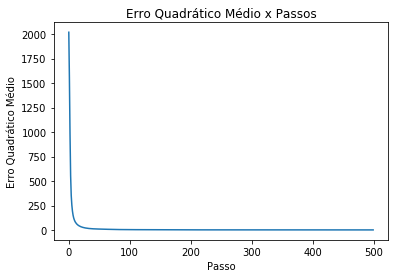

In [122]:
file = plt.figure()
plt.plot(history_holidays.history['loss'])
plt.title('Erro Quadrático Médio x Passos')
plt.ylabel('Erro Quadrático Médio')
plt.xlabel('Passo')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-holidays.pdf", bbox_inches='tight')


In [123]:
y_mean = np.mean(y)
error = history_holidays.history['loss'][-1]
percentage_error = error/y_mean * 100
percentage_error

2.9636604205808803

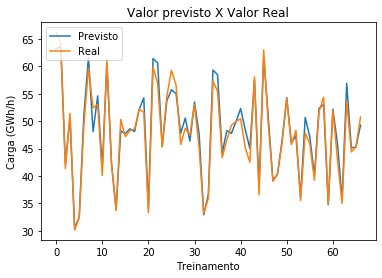

In [127]:
### Ploting for test base

file = plt.figure()

plt.plot([y_pred_holidays[n] for n in range(0, len(y_pred_holidays)) if n % 10 == 0])
plt.plot([holidays_y_test[n] for n in range(0, len(y_pred_holidays)) if n % 10 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-base-teste-feriados.pdf", bbox_inches='tight')

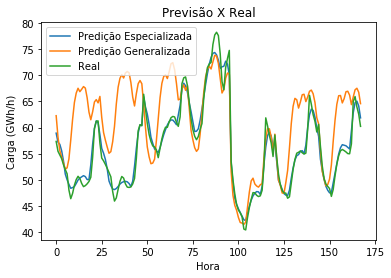

In [131]:
### Ploting for last holidays

sc = StandardScaler()
y_last_holidays = network_holidays.predict(sc.fit_transform(holidays_X))
y_last_holidays_old = network_no_linear.predict(sc.fit_transform(X[X[:, 8] == 1, :]))

file = plt.figure()

plt.plot(y_last_holidays[-24*7:], label="Predição Especializada")
plt.plot(y_last_holidays_old[-24*7:], label="Predição Generalizada")
plt.plot(holidays_y[-24*7:], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-feriados.pdf", bbox_inches='tight')

#### for not holidays

In [133]:
#  filter original db
no_holidays_X = X[X[:, 8] == 0, :]
no_holidays_X = np.delete(no_holidays_X, 8, 1)

no_holidays_y = y[X[:, 8] == 0]

# split into train and test sets
no_holidays_X_train, no_holidays_X_test, no_holidays_y_train, no_holidays_y_test = train_test_split(no_holidays_X, no_holidays_y, test_size = 0.2 , random_state = 0)
sc = StandardScaler()

# scale
no_holidays_X_train = sc.fit_transform(no_holidays_X_train)
no_holidays_X_test = sc.transform(no_holidays_X_test)

# build network
network_no_holidays = Sequential()
network_no_holidays.add(Dense(input_dim=no_holidays_X.shape[1], output_dim=44, activation='relu', bias_initializer='random_normal'))
network_no_holidays.add(Dense(output_dim=1, activation='linear', bias_initializer='random_normal'))
network_no_holidays.compile(optimizer='adam', loss='mean_squared_error')
history_no_holidays = History()

# train
network_no_holidays.fit(no_holidays_X_train, no_holidays_y_train, epochs=50, callbacks=[history_no_holidays])
y_pred_no_holidays = network_no_holidays.predict(no_holidays_X_test)


/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=29, activation="relu", bias_initializer="random_normal", units=44)`
/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`


Epoch 1/50
75735/75735 [==============================] - 2s 29us/step - loss: 404.4741
Epoch 2/50
75735/75735 [==============================] - 2s 24us/step - loss: 28.2818
Epoch 3/50
75735/75735 [==============================] - 2s 24us/step - loss: 13.3460
Epoch 4/50
75735/75735 [==============================] - 2s 23us/step - loss: 9.1975
Epoch 5/50
75735/75735 [==============================] - 2s 23us/step - loss: 7.7408
Epoch 6/50
75735/75735 [==============================] - 2s 23us/step - loss: 6.7811
Epoch 7/50
75735/75735 [==============================] - 2s 25us/step - loss: 6.0639
Epoch 8/50
75735/75735 [==============================] - 2s 26us/step - loss: 5.5107
Epoch 9/50
75735/75735 [==============================] - 2s 25us/step - loss: 5.0661
Epoch 10/50
75735/75735 [==============================] - 2s 25us/step - loss: 4.7250
Epoch 11/50
75735/75735 [==============================] - 2s 25us/step - loss: 4.4352
Epoch 12/50
75735/75735 [=======================

In [134]:
y_mean = np.mean(y)
error = history_no_holidays.history['loss'][-1]
percentage_error = error/y_mean * 100
percentage_error

4.499054211101986

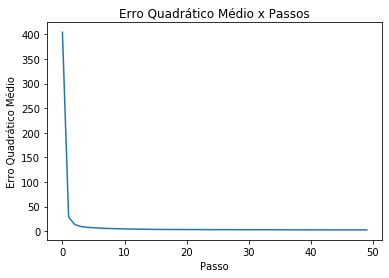

In [147]:
### Error

file = plt.figure()
plt.plot(history_no_holidays.history['loss'])
plt.title('Erro Quadrático Médio x Passos')
plt.ylabel('Erro Quadrático Médio')
plt.xlabel('Passo')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-no-holidays.pdf", bbox_inches='tight')


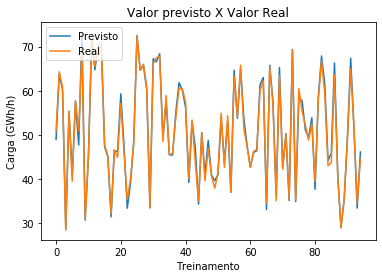

In [136]:
### Ploting for test base

file = plt.figure()

plt.plot([y_pred_no_holidays[n] for n in range(0, len(y_pred_no_holidays)) if n % 200 == 0])
plt.plot([no_holidays_y_test[n] for n in range(0, len(y_pred_no_holidays)) if n % 200 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-base-teste-nao-feriados.pdf", bbox_inches='tight')

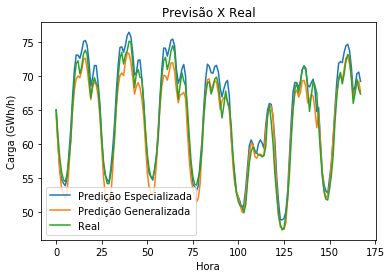

In [138]:
### Ploting for last week

sc = StandardScaler()
y_last_no_holidays = network_no_holidays.predict(sc.fit_transform(no_holidays_X))
y_last_no_holidays_old = network_no_linear.predict(sc.fit_transform(X[X[:, 8] == 0, :]))

file = plt.figure()

plt.plot(y_last_no_holidays[-24*7:], label="Predição Especializada")
plt.plot(y_last_no_holidays_old[-24*7:], label="Predição Generalizada")
plt.plot(no_holidays_y[-24*7:], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-nao-feriados.pdf", bbox_inches='tight')

### last year network

In [142]:
dataset.columns.tolist()

['Anos após 2000',
 'Mês do Ano',
 'Dia do Mês',
 'Hora do dia',
 'Dia da Semana',
 'Feriado',
 'temp-go.csv',
 'temp-to.csv',
 'temp-am.csv',
 'temp-df.csv',
 'temp-rs.csv',
 'temp-al.csv',
 'temp-pe.csv',
 'temp-pa.csv',
 'temp-mg.csv',
 'temp-ce.csv',
 'temp-rn.csv',
 'temp-rj.csv',
 'temp-pi.csv',
 'temp-sp.csv',
 'temp-ac.csv',
 'temp-pb.csv',
 'temp-mt.csv',
 'temp-es.csv',
 'temp-ba.csv',
 'temp-ap.csv',
 'temp-pr.csv',
 'temp-sc.csv',
 'temp-se.csv',
 'temp-ma.csv',
 'Carga']

In [144]:
dataset.columns.tolist().index('temp-am.csv')

8

In [145]:
dataset.columns.tolist().index('temp-ap.csv')

25

In [146]:
dataset.columns.tolist().index('temp-ac.csv')

20

In [141]:
# correlation

values = np.insert(last_year_X, last_year_X.shape[1], last_year_y, 1)
dataframe = pd.DataFrame(values)
corr = dataframe.corr(min_periods=1000)
corr[values.shape[1]-1]

0    -0.005797
1     0.151635
2     0.174699
3    -0.030592
4    -0.615809
5    -0.192085
6     0.340343
7    -0.192448
8    -0.133901
9     0.124722
10    0.005159
11   -0.030885
12    0.156982
13    0.216307
14    0.185313
15    0.195815
16    0.250506
17    0.250506
18    0.095211
19    0.194891
20    0.218800
21    0.054152
22    0.234968
23    0.083675
24    0.201311
25    0.133339
26    0.259571
27    0.204282
28   -0.102970
29    0.244017
30    0.234428
31    0.178777
32   -0.021760
33    1.000000
Name: 33, dtype: float64

In [139]:
#  filter original db
last_year_X = dataset.iloc[:, :-1].values[-24*365:, ]
last_year_y = y[-24*365:]

# cycle features
months_in_year = 12
months = last_year_X[:, 1]
sin_month = np.sin(2*np.pi*months/months_in_year)
cos_month = np.cos(2*np.pi*months/months_in_year)
last_year_X = np.delete(last_year_X, 1, 1)
last_year_X = np.insert(last_year_X, 1, sin_month, 1)
last_year_X = np.insert(last_year_X, 2, cos_month, 1)

hours_in_day = 24
hours = last_year_X[:, 4]
sin_hour = np.sin(2*np.pi*hours/hours_in_day)
cos_hour = np.cos(2*np.pi*hours/hours_in_day)

last_year_X = np.delete(last_year_X, 4, 1)
last_year_X = np.insert(last_year_X, 4, sin_hour, 1)
last_year_X = np.insert(last_year_X, 5, cos_hour, 1)

number_of_weekdays = 7
weekdays = last_year_X[:, 6]
sin_weekdays = np.sin(2*np.pi*weekdays/number_of_weekdays)
cos_weekdays = np.cos(2*np.pi*weekdays/number_of_weekdays)
last_year_X = np.delete(last_year_X, 6, 1)
last_year_X = np.insert(last_year_X, 6, sin_weekdays, 1)
last_year_X = np.insert(last_year_X, 7, cos_weekdays, 1)

# split into train and test sets
last_year_X_train, last_year_X_test, last_year_y_train, last_year_y_test = train_test_split(last_year_X, last_year_y, test_size = 0.2 , random_state = 0)
sc = StandardScaler()

# scale
last_year_X_train = sc.fit_transform(last_year_X_train)
last_year_X_test = sc.transform(last_year_X_test)

# build network
last_year_network = Sequential()
last_year_network.add(Dense(input_dim=last_year_X_train.shape[1], output_dim=44, activation='relu', bias_initializer='random_normal'))
last_year_network.add(Dense(output_dim=1, activation='linear', bias_initializer='random_normal'))
last_year_network.compile(optimizer='adam', loss='mean_squared_error')
last_year_history = History()

# train
last_year_network.fit(last_year_X_train, last_year_y_train, epochs=500, callbacks=[last_year_history])
last_year_y_pred = last_year_network.predict(last_year_X_test)

/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=33, activation="relu", bias_initializer="random_normal", units=44)`
/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`


Epoch 1/500
7008/7008 [==============================] - 0s 64us/step - loss: 3107.3103
Epoch 2/500
7008/7008 [==============================] - 0s 25us/step - loss: 1099.8734
Epoch 3/500
7008/7008 [==============================] - 0s 27us/step - loss: 413.7249
Epoch 4/500
7008/7008 [==============================] - 0s 29us/step - loss: 281.0465
Epoch 5/500
7008/7008 [==============================] - 0s 26us/step - loss: 195.9754
Epoch 6/500
7008/7008 [==============================] - 0s 25us/step - loss: 140.0184
Epoch 7/500
7008/7008 [==============================] - 0s 27us/step - loss: 103.5934
Epoch 8/500
7008/7008 [==============================] - 0s 26us/step - loss: 80.3103
Epoch 9/500
7008/7008 [==============================] - 0s 25us/step - loss: 65.1804
Epoch 10/500
7008/7008 [==============================] - 0s 25us/step - loss: 55.1304
Epoch 11/500
7008/7008 [==============================] - 0s 26us/step - loss: 48.1037
Epoch 12/500
7008/7008 [===================

7008/7008 [==============================] - 0s 25us/step - loss: 4.0397
Epoch 96/500
7008/7008 [==============================] - 0s 26us/step - loss: 4.0216
Epoch 97/500
7008/7008 [==============================] - 0s 26us/step - loss: 3.9588
Epoch 98/500
7008/7008 [==============================] - 0s 25us/step - loss: 3.9671
Epoch 99/500
7008/7008 [==============================] - 0s 25us/step - loss: 3.9257
Epoch 100/500
7008/7008 [==============================] - 0s 26us/step - loss: 3.9051
Epoch 101/500
7008/7008 [==============================] - 0s 25us/step - loss: 3.8631
Epoch 102/500
7008/7008 [==============================] - 0s 26us/step - loss: 3.8491
Epoch 103/500
7008/7008 [==============================] - 0s 27us/step - loss: 3.7888
Epoch 104/500
7008/7008 [==============================] - 0s 26us/step - loss: 3.7810
Epoch 105/500
7008/7008 [==============================] - 0s 25us/step - loss: 3.7618
Epoch 106/500
7008/7008 [==============================] - 0s

7008/7008 [==============================] - 0s 27us/step - loss: 2.3807
Epoch 190/500
7008/7008 [==============================] - 0s 25us/step - loss: 2.3839
Epoch 191/500
7008/7008 [==============================] - 0s 24us/step - loss: 2.3458
Epoch 192/500
7008/7008 [==============================] - 0s 25us/step - loss: 2.3590
Epoch 193/500
7008/7008 [==============================] - 0s 26us/step - loss: 2.3579
Epoch 194/500
7008/7008 [==============================] - 0s 25us/step - loss: 2.3341
Epoch 195/500
7008/7008 [==============================] - 0s 24us/step - loss: 2.3167
Epoch 196/500
7008/7008 [==============================] - 0s 27us/step - loss: 2.3396
Epoch 197/500
7008/7008 [==============================] - 0s 24us/step - loss: 2.3130
Epoch 198/500
7008/7008 [==============================] - 0s 26us/step - loss: 2.3312
Epoch 199/500
7008/7008 [==============================] - 0s 25us/step - loss: 2.3069
Epoch 200/500
7008/7008 [==============================] 

7008/7008 [==============================] - 0s 27us/step - loss: 1.9778
Epoch 284/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.9471
Epoch 285/500
7008/7008 [==============================] - 0s 26us/step - loss: 1.9517
Epoch 286/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.9485
Epoch 287/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.9507
Epoch 288/500
7008/7008 [==============================] - 0s 26us/step - loss: 1.9597
Epoch 289/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.9576
Epoch 290/500
7008/7008 [==============================] - 0s 27us/step - loss: 1.9211
Epoch 291/500
7008/7008 [==============================] - 0s 26us/step - loss: 1.9068
Epoch 292/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.9145
Epoch 293/500
7008/7008 [==============================] - 0s 26us/step - loss: 1.9275
Epoch 294/500
7008/7008 [==============================] 

7008/7008 [==============================] - 0s 25us/step - loss: 1.6712
Epoch 378/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.6939
Epoch 379/500
7008/7008 [==============================] - 0s 26us/step - loss: 1.6655
Epoch 380/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.6582
Epoch 381/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.6558
Epoch 382/500
7008/7008 [==============================] - 0s 24us/step - loss: 1.6584
Epoch 383/500
7008/7008 [==============================] - 0s 24us/step - loss: 1.6636
Epoch 384/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.6416
Epoch 385/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.6433
Epoch 386/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.6591
Epoch 387/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.6275
Epoch 388/500
7008/7008 [==============================] 

7008/7008 [==============================] - 0s 25us/step - loss: 1.5151
Epoch 472/500
7008/7008 [==============================] - 0s 27us/step - loss: 1.5251
Epoch 473/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.5009
Epoch 474/500
7008/7008 [==============================] - 0s 26us/step - loss: 1.5046
Epoch 475/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.5085
Epoch 476/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.5108
Epoch 477/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.5193
Epoch 478/500
7008/7008 [==============================] - 0s 26us/step - loss: 1.5193
Epoch 479/500
7008/7008 [==============================] - 0s 26us/step - loss: 1.5129
Epoch 480/500
7008/7008 [==============================] - 0s 25us/step - loss: 1.5108
Epoch 481/500
7008/7008 [==============================] - 0s 26us/step - loss: 1.5136
Epoch 482/500
7008/7008 [==============================] 

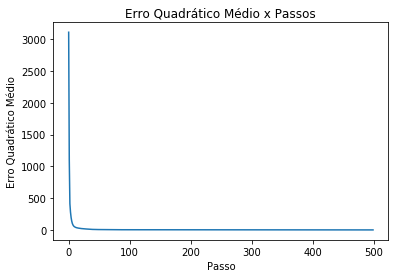

In [148]:
### Error

file = plt.figure()
plt.plot(last_year_history.history['loss'])
plt.title('Erro Quadrático Médio x Passos')
plt.ylabel('Erro Quadrático Médio')
plt.xlabel('Passo')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-last-year.pdf", bbox_inches='tight')

In [149]:
y_mean = np.mean(last_year_y)
error = last_year_history.history['loss'][-1]
percentage_error = error/y_mean * 100
percentage_error

2.444701565234857

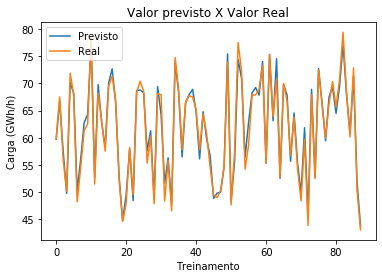

In [151]:
### Ploting for test base

file = plt.figure()

plt.plot([last_year_y_pred[n] for n in range(0, len(last_year_y_pred)) if n % 20 == 0])
plt.plot([last_year_y_test[n] for n in range(0, len(last_year_y_pred)) if n % 20 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-base-teste-ultimo-ano.pdf", bbox_inches='tight')

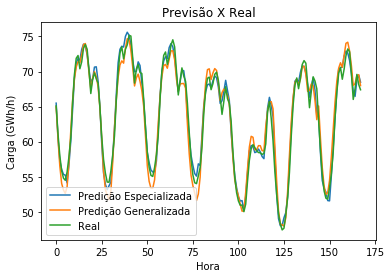

In [153]:
### Ploting for last week

sc = StandardScaler()
last_year_y = last_year_network.predict(sc.fit_transform(last_year_X))
y_last_no_holidays_old = network_no_linear.predict(sc.fit_transform(X))

file = plt.figure()

plt.plot(last_year_y[-24*7:], label="Predição Especializada")
plt.plot(y_last_no_holidays_old[-24*7:], label="Predição Generalizada")
plt.plot(y[-24*7:], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-ultimo-ano.pdf", bbox_inches='tight')

### Load time shift network

In [176]:
# add shifted load
last_hour_load = np.delete(y, 0, 0)
last_hour_X = np.delete(X, X.shape[0]-1, 0)
last_hour_y = np.delete(y, y.shape[0]-1, 0)
last_hour_X = np.insert(last_hour_X, last_hour_X.shape[1], last_hour_load, 1)

# split into train and test sets
last_hour_X_train, last_hour_X_test, last_hour_y_train, last_hour_y_test = train_test_split(last_hour_X, last_hour_y, test_size = 0.2 , random_state = 0)
sc = StandardScaler()

# scale
last_hour_X_train = sc.fit_transform(last_hour_X_train)
last_hour_X_test = sc.transform(last_hour_X_test)

# build network
last_hour_network = Sequential()

last_hour_dense1 = Dense(input_dim=last_hour_X.shape[1], output_dim=44, activation='relu', bias_initializer='random_normal')
last_hour_dense2 = Dense(output_dim=1, activation='linear', bias_initializer='random_normal')

last_hour_network.add(last_hour_dense1)
last_hour_network.add(last_hour_dense2)
last_hour_network.compile(optimizer='adam', loss='mean_squared_error')
last_hour_history = History()

# train
last_hour_network.fit(last_hour_X_train, last_hour_y_train, epochs=50, callbacks=[last_hour_history])
last_hour_y_pred = last_hour_network.predict(last_hour_X_test)

/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=31, activation="relu", bias_initializer="random_normal", units=44)`
/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`


Epoch 1/50
78402/78402 [==============================] - 2s 29us/step - loss: 400.5401
Epoch 2/50
78402/78402 [==============================] - 2s 25us/step - loss: 11.6007
Epoch 3/50
78402/78402 [==============================] - 2s 25us/step - loss: 4.5891
Epoch 4/50
78402/78402 [==============================] - 2s 25us/step - loss: 3.3017
Epoch 5/50
78402/78402 [==============================] - 2s 25us/step - loss: 2.8301
Epoch 6/50
78402/78402 [==============================] - 2s 25us/step - loss: 2.5451
Epoch 7/50
78402/78402 [==============================] - 2s 25us/step - loss: 2.3439
Epoch 8/50
78402/78402 [==============================] - 2s 25us/step - loss: 2.2128
Epoch 9/50
78402/78402 [==============================] - 2s 25us/step - loss: 2.1199
Epoch 10/50
78402/78402 [==============================] - 2s 25us/step - loss: 2.0467
Epoch 11/50
78402/78402 [==============================] - 2s 25us/step - loss: 1.9976
Epoch 12/50
78402/78402 [========================

In [170]:
# correlation

values = np.insert(last_hour_X, last_hour_X.shape[1], last_hour_y, 1)
dataframe = pd.DataFrame(values)
corr = dataframe.corr(min_periods=1000)
corr[values.shape[1]-1]


0     0.701910
1     0.097148
2     0.100691
3     0.007004
4    -0.441680
5    -0.112475
6     0.209079
7    -0.117775
8    -0.102862
9     0.108995
10    0.035748
11    0.130964
12    0.147729
13    0.204676
14    0.126223
15    0.190142
16    0.190142
17    0.157393
18    0.104118
19    0.120988
20   -0.047577
21    0.180580
22    0.120942
23    0.124708
24    0.154440
25    0.022655
26    0.167262
27    0.156397
28    0.214941
29    0.169024
30    0.974612
31    1.000000
Name: 31, dtype: float64

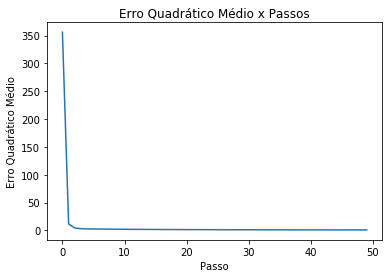

In [172]:
### Error ploting

file = plt.figure()
plt.plot(last_hour_history.history['loss'])
plt.title('Erro Quadrático Médio x Passos')
plt.ylabel('Erro Quadrático Médio')
plt.xlabel('Passo')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/erro-network-last-hour.pdf", bbox_inches='tight')

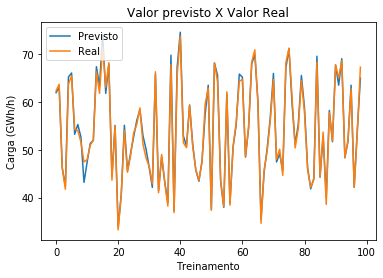

In [173]:
### Ploting for test base

file = plt.figure()

plt.plot([last_hour_y_pred[n] for n in range(0, len(last_hour_y_pred)) if n % 200 == 0])
plt.plot([last_hour_y_test[n] for n in range(0, len(last_hour_y_pred)) if n % 200 == 0])
plt.title('Valor previsto X Valor Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Treinamento')
plt.legend(['Previsto', 'Real'], loc='upper left')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-base-teste-ultima-hora.pdf", bbox_inches='tight')

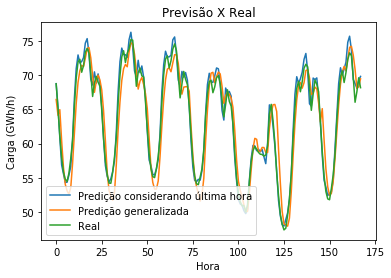

In [174]:
### Ploting for last week

sc = StandardScaler()
last_hour_y = last_hour_network.predict(sc.fit_transform(last_hour_X))
y_last_no_holidays_old = network_no_linear.predict(sc.fit_transform(X[:-1,]))

file = plt.figure()

plt.plot(last_hour_y[-24*7:], label="Predição considerando última hora")
plt.plot(y_last_no_holidays_old[-24*7-1:-1], label="Predição generalizada")
plt.plot(y[-24*7-1:-1], label="Real")
plt.legend(loc='best')

plt.title('Previsão X Real')
plt.ylabel('Carga (GWh/h)')
plt.xlabel('Hora')
plt.show()

file.savefig("../brazilian-load-prediction/imagens/desempenho-ultima-hora.pdf", bbox_inches='tight')

In [175]:
y_mean = np.mean(last_hour_y)
error = last_hour_history.history['loss'][-1]
percentage_error = error/y_mean * 100
percentage_error

1.6987777618214148

In [177]:
last_hour_dense1.get_weights()

[array([[ 0.37341732,  0.63227844, -0.4258476 , ...,  0.28835544,
          0.19477668,  0.3994677 ],
        [-0.38368455,  0.34312266,  1.096766  , ...,  0.12106024,
         -1.2187091 ,  0.11969   ],
        [-1.1417091 ,  0.5581708 ,  1.3905697 , ..., -0.07823968,
          1.1415193 , -0.24823287],
        ...,
        [-0.13719648,  0.352117  , -0.03399087, ..., -0.01806304,
         -0.06379065, -0.06993241],
        [-0.02965802, -0.22785282, -0.04339428, ..., -0.00255269,
         -0.10756131, -0.01518413],
        [ 1.3417214 ,  0.986238  ,  0.7592568 , ..., -0.30653948,
          0.28370535, -1.610306  ]], dtype=float32),
 array([ 0.9009259 ,  0.54229814,  1.1529601 , -0.97667885, -0.64148736,
         1.7916807 ,  3.2079394 ,  0.20928037, -0.2528688 ,  1.8053803 ,
         1.9167467 ,  1.7797617 ,  0.41475824,  0.16594735,  0.3012778 ,
         2.363548  ,  2.483794  ,  2.0414827 ,  1.4773803 ,  1.5210835 ,
         1.2095731 ,  1.5570347 ,  0.8320313 ,  1.5728716 , -0.150

In [179]:
last_hour_dense1.get_weights()[-1]

array([ 0.9009259 ,  0.54229814,  1.1529601 , -0.97667885, -0.64148736,
        1.7916807 ,  3.2079394 ,  0.20928037, -0.2528688 ,  1.8053803 ,
        1.9167467 ,  1.7797617 ,  0.41475824,  0.16594735,  0.3012778 ,
        2.363548  ,  2.483794  ,  2.0414827 ,  1.4773803 ,  1.5210835 ,
        1.2095731 ,  1.5570347 ,  0.8320313 ,  1.5728716 , -0.15080044,
       -0.23529564,  0.95699036,  0.7903759 ,  0.9613551 , -0.93841106,
        1.0184221 , -0.6718681 ,  2.3482893 ,  1.6879554 ,  1.9794514 ,
        2.6299934 ,  1.3235881 ,  1.4525833 ,  0.57276064,  1.0430366 ,
        1.2274008 ,  3.764117  ,  1.7030057 , -0.7737647 ], dtype=float32)

In [180]:
last_hour_dense2.get_weights()


[array([[ 0.20912942],
        [ 0.2611524 ],
        [ 0.3147067 ],
        [-1.1807889 ],
        [-0.5778242 ],
        [ 0.38041446],
        [ 2.3323832 ],
        [-0.87085074],
        [-0.4841214 ],
        [ 1.0018827 ],
        [ 0.7069474 ],
        [ 0.8100175 ],
        [ 1.575598  ],
        [ 0.65414846],
        [ 0.44685227],
        [ 0.5256813 ],
        [ 1.458346  ],
        [ 0.9633459 ],
        [ 0.37890735],
        [ 0.42343867],
        [ 0.35662282],
        [ 0.10606335],
        [ 0.5915867 ],
        [ 1.1793017 ],
        [ 0.6316824 ],
        [ 0.12751247],
        [ 0.47959372],
        [ 0.4485175 ],
        [ 1.2610017 ],
        [-0.8210747 ],
        [ 0.48638403],
        [-0.6693262 ],
        [ 0.73490393],
        [ 0.35873988],
        [ 0.27716672],
        [ 0.5514191 ],
        [ 0.1880672 ],
        [ 0.31295958],
        [ 0.34424117],
        [ 0.31488267],
        [ 0.7951331 ],
        [ 2.0758932 ],
        [ 0.33973715],
        [-0

In [181]:
last_hour_densetest = Dense(output_dim=1, activation='linear', bias_initializer='random_normal')


/home/asnunes/anaconda3/envs/tcc/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", bias_initializer="random_normal", units=1)`
  """Entry point for launching an IPython kernel.


[]